<a href="https://colab.research.google.com/github/shreyas1209/Sudoku_Solver_App/blob/main/Sudoku_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import cv2

In [100]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [101]:
image = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku.jpg')
image1 = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku_1.jpg')


In [102]:
import sys

sys.path.append('/content/gdrive/MyDrive/Sudoku/Models')
sys.path.append('/content/gdrive/MyDrive/Sudoku')



In [103]:
from sudoku_net import *

In [104]:
model1 = sudokunet1(output_classes=10)
model2 = sudokunet2(output_classes=10)
model3 = sudokunet3(output_classes=10)

In [105]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1.load_state_dict(torch.load('/content/gdrive/MyDrive/Sudoku/sudokunet_model1_weights.pth', map_location="cuda:0")) #cuda:0
model1.to(device)
model2.load_state_dict(torch.load('/content/gdrive/MyDrive/Sudoku/sudokunet_model2_weights.pth', map_location="cuda:0")) #cuda:0
model2.to(device)
model3.load_state_dict(torch.load('/content/gdrive/MyDrive/Sudoku/sudokunet_model3_weights.pth', map_location="cuda:0")) #cuda:0
model3.to(device)


sudokunet3(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2304, out_features=256, bias=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [106]:
from sudoku_detector import *
from sudoku_solver import *

In [107]:
def image_preproccesor (img):
  pic = sudoku_detector(img)
  boundary = find_boundary(img,pic)
  crop = crop_and_warp(img,pic,boundary)

  return crop


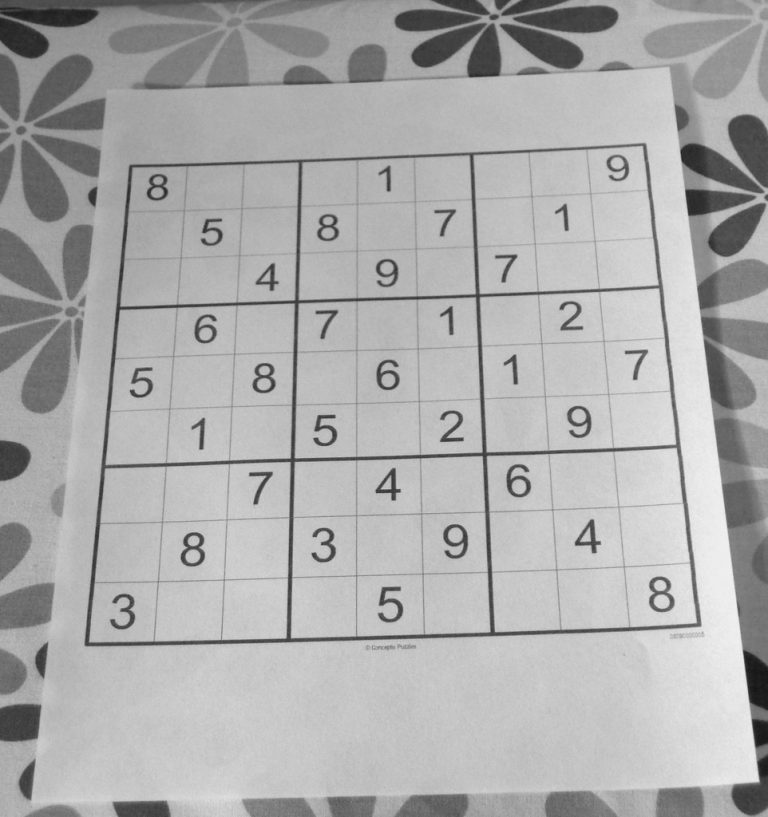

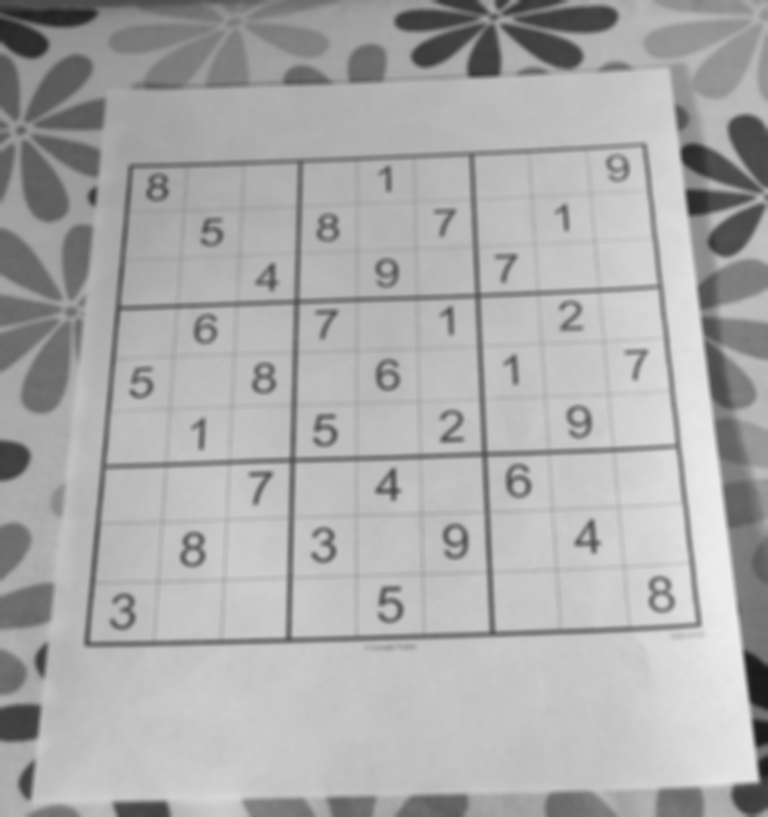

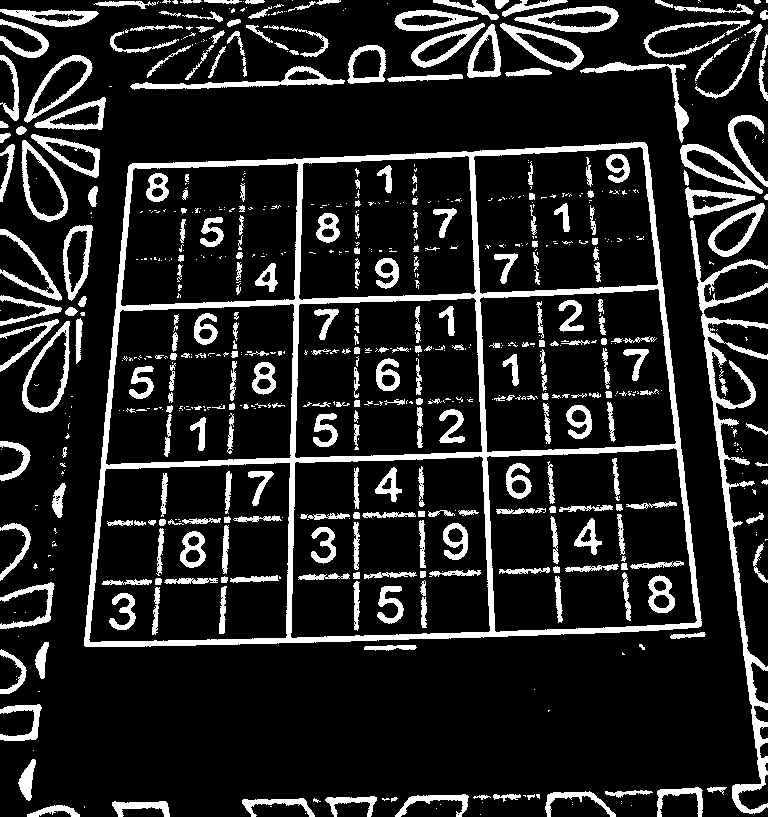

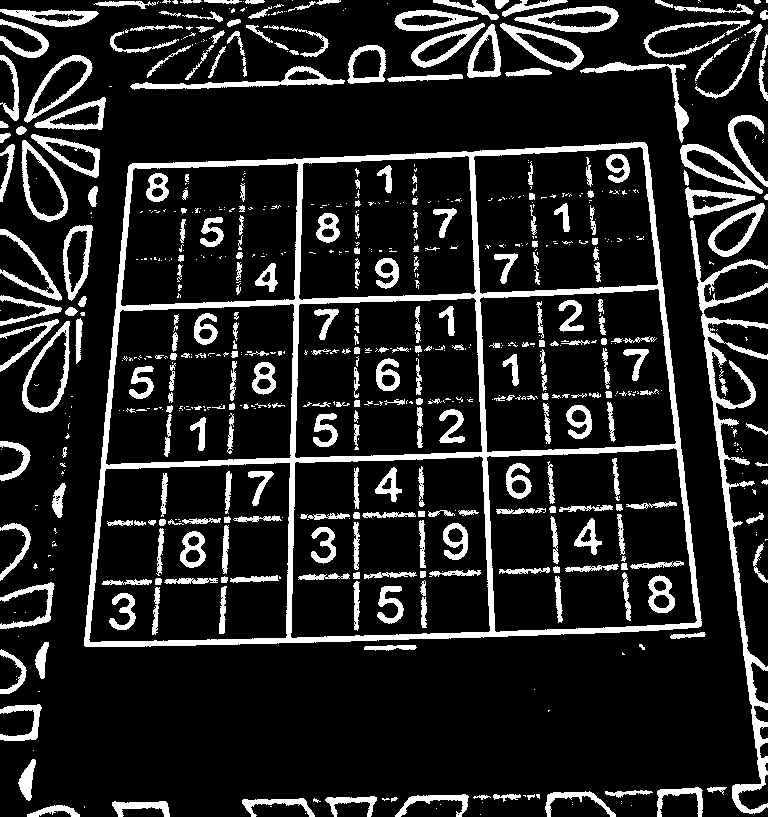

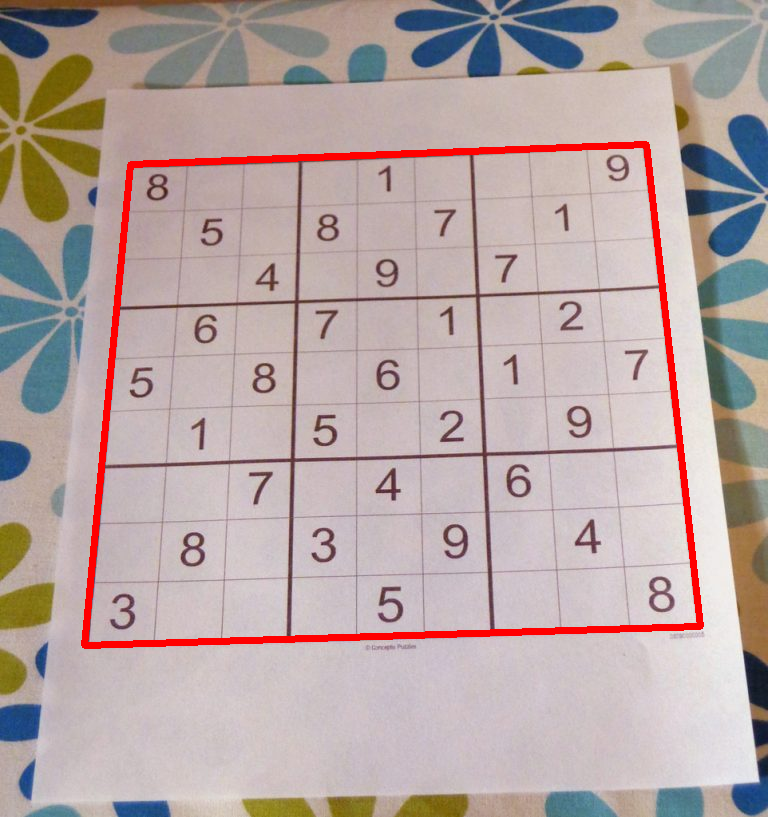

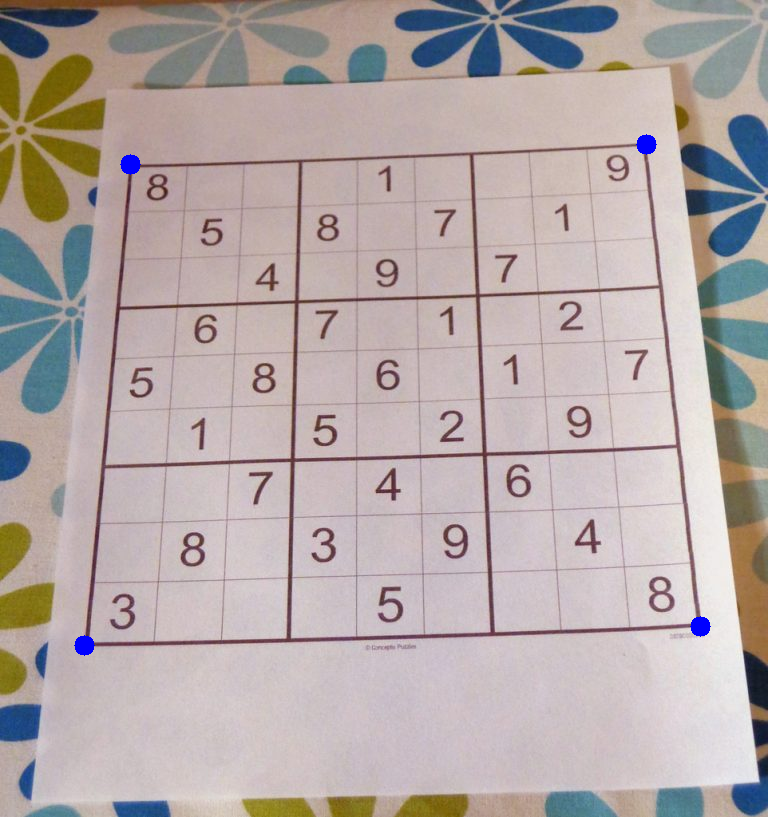

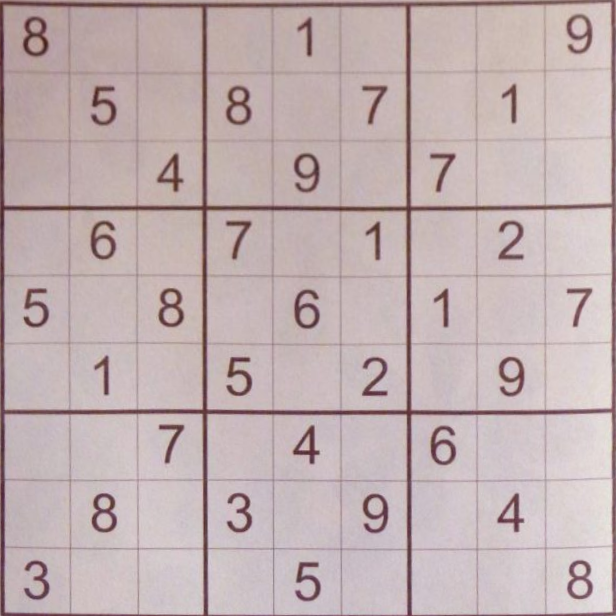

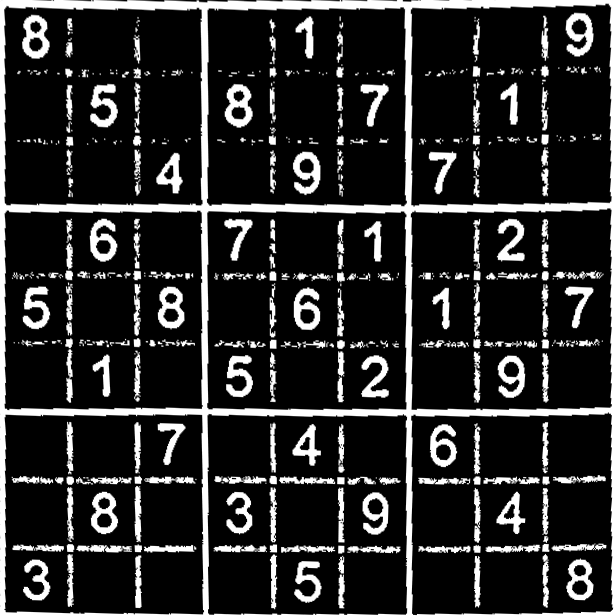

In [108]:
img = image_preproccesor(image)

In [109]:
def digit_reader(image,img_size,grid_size,model1,model2,model3,tolerance = 0,show=True):
  sudoku_array = []
  img = cv2.resize(image,img_size)
  cv2_imshow(img)
  for i in range(grid_size[0]):
    for j in range(grid_size[1]):
      digit = digit_extraction(img,(i,j),img_size,grid_size,extracted_img_size=(28,28),show = show, tolerance = tolerance)
      digit = torch.tensor(digit)
      blank_threshold = (torch.sum(digit))
      if blank_threshold <=(255*15):
        sudoku_array.append(0)
        if (show==True):
          print(torch.tensor([0]))
      else:
        digit = digit.reshape((1,1,28,28)).float()
      
        model1.eval()
        model2.eval()
        model3.eval()
        model1 = model1.to(device = device)
        model2 = model2.to(device = device)
        model3 = model3.to(device = device)
        digit = digit.to(device)
        digit_read =torch.tensor([0,0,0])
        digit_read[0] = predict(model1,digit)
        digit_read[1] = predict(model2,digit)
        digit_read[2] = predict(model3,digit)
        
        digit_final = torch.mode(digit_read)
        if (show ==True):
          print(digit_read)
          print(digit_final)
        sudoku_array.append(digit_final[0])
        
  sudoku_array = np.array(sudoku_array) 
  return (sudoku_array)
  
  

      

In [110]:
def print_sudoku_array(sudoku_array):
  
  sudoku_array = np.reshape(sudoku_array,(9,9))
  print(sudoku_array)
  


In [111]:
def sudoku_reader (image,model1,model2,model3,show = True):
  digit_read = digit_reader(image,(360,360),(9,9),model1,model2,model3,show=show)
  print_sudoku_array(digit_read)
  return(digit_read.reshape(9,9))

  

In [112]:
def solved_sudoku(sudoku_array,show = True):
  output = solve_sudoku(sudoku_array)
  if(output[0]==True):
    print(output[1])  

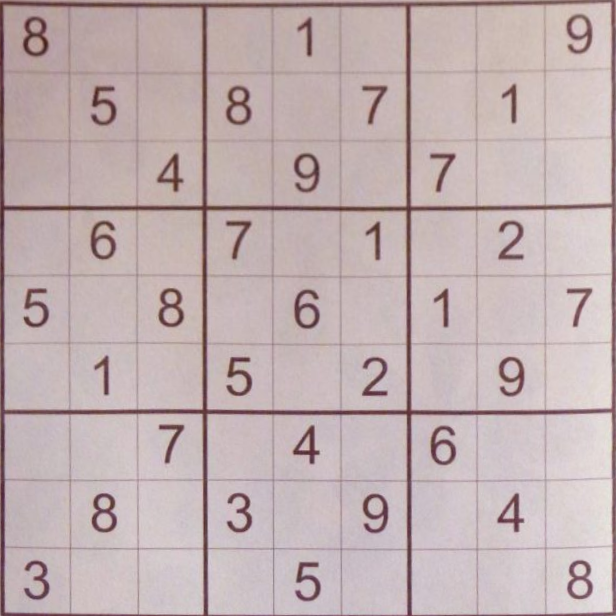

In [113]:
cv2_imshow(img[0])

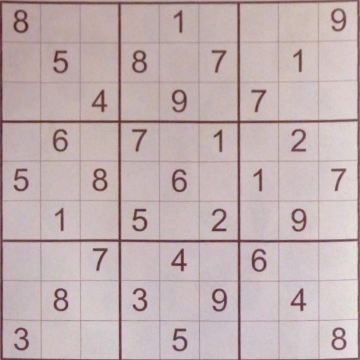

[[8 0 0 0 1 0 0 0 9]
 [0 5 0 8 0 7 0 1 0]
 [0 0 4 0 9 0 7 0 0]
 [0 6 0 7 0 1 0 2 0]
 [5 0 8 0 6 0 1 0 7]
 [0 1 0 5 0 2 0 9 0]
 [0 0 7 0 4 0 6 0 0]
 [0 8 0 3 0 9 0 4 0]
 [3 0 0 0 5 0 0 0 8]]


/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:75: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:109: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


In [114]:
sudoku_read = sudoku_reader(img[0],model1,model2,model3,show = False)

In [115]:

solved_sudoku(sudoku_read)

[[8 7 2 4 1 3 5 6 9]
 [9 5 6 8 2 7 3 1 4]
 [1 3 4 6 9 5 7 8 2]
 [4 6 9 7 3 1 8 2 5]
 [5 2 8 9 6 4 1 3 7]
 [7 1 3 5 8 2 4 9 6]
 [2 9 7 1 4 8 6 5 3]
 [6 8 5 3 7 9 2 4 1]
 [3 4 1 2 5 6 9 7 8]]


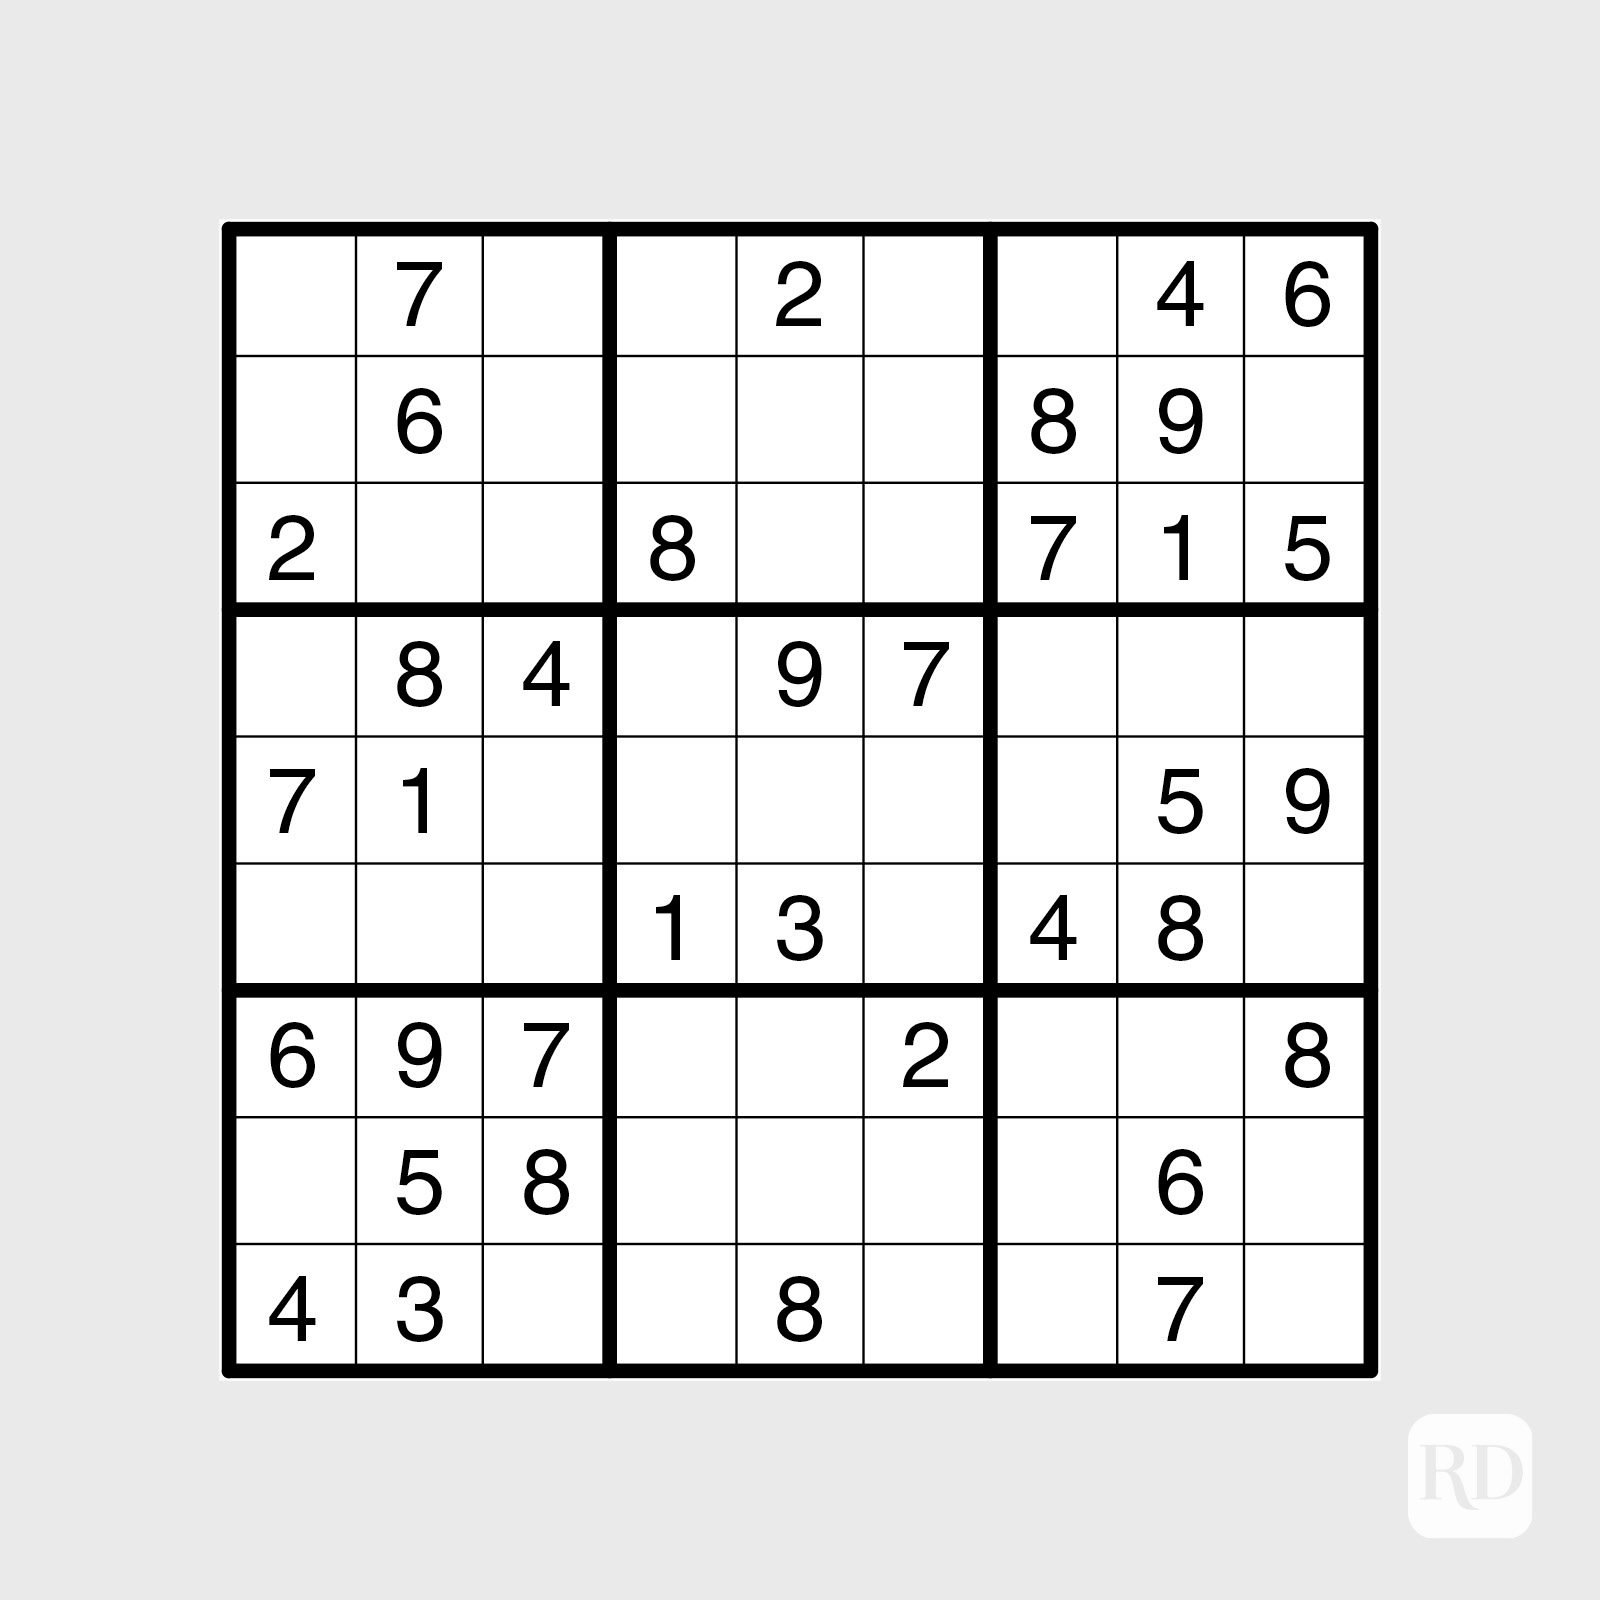

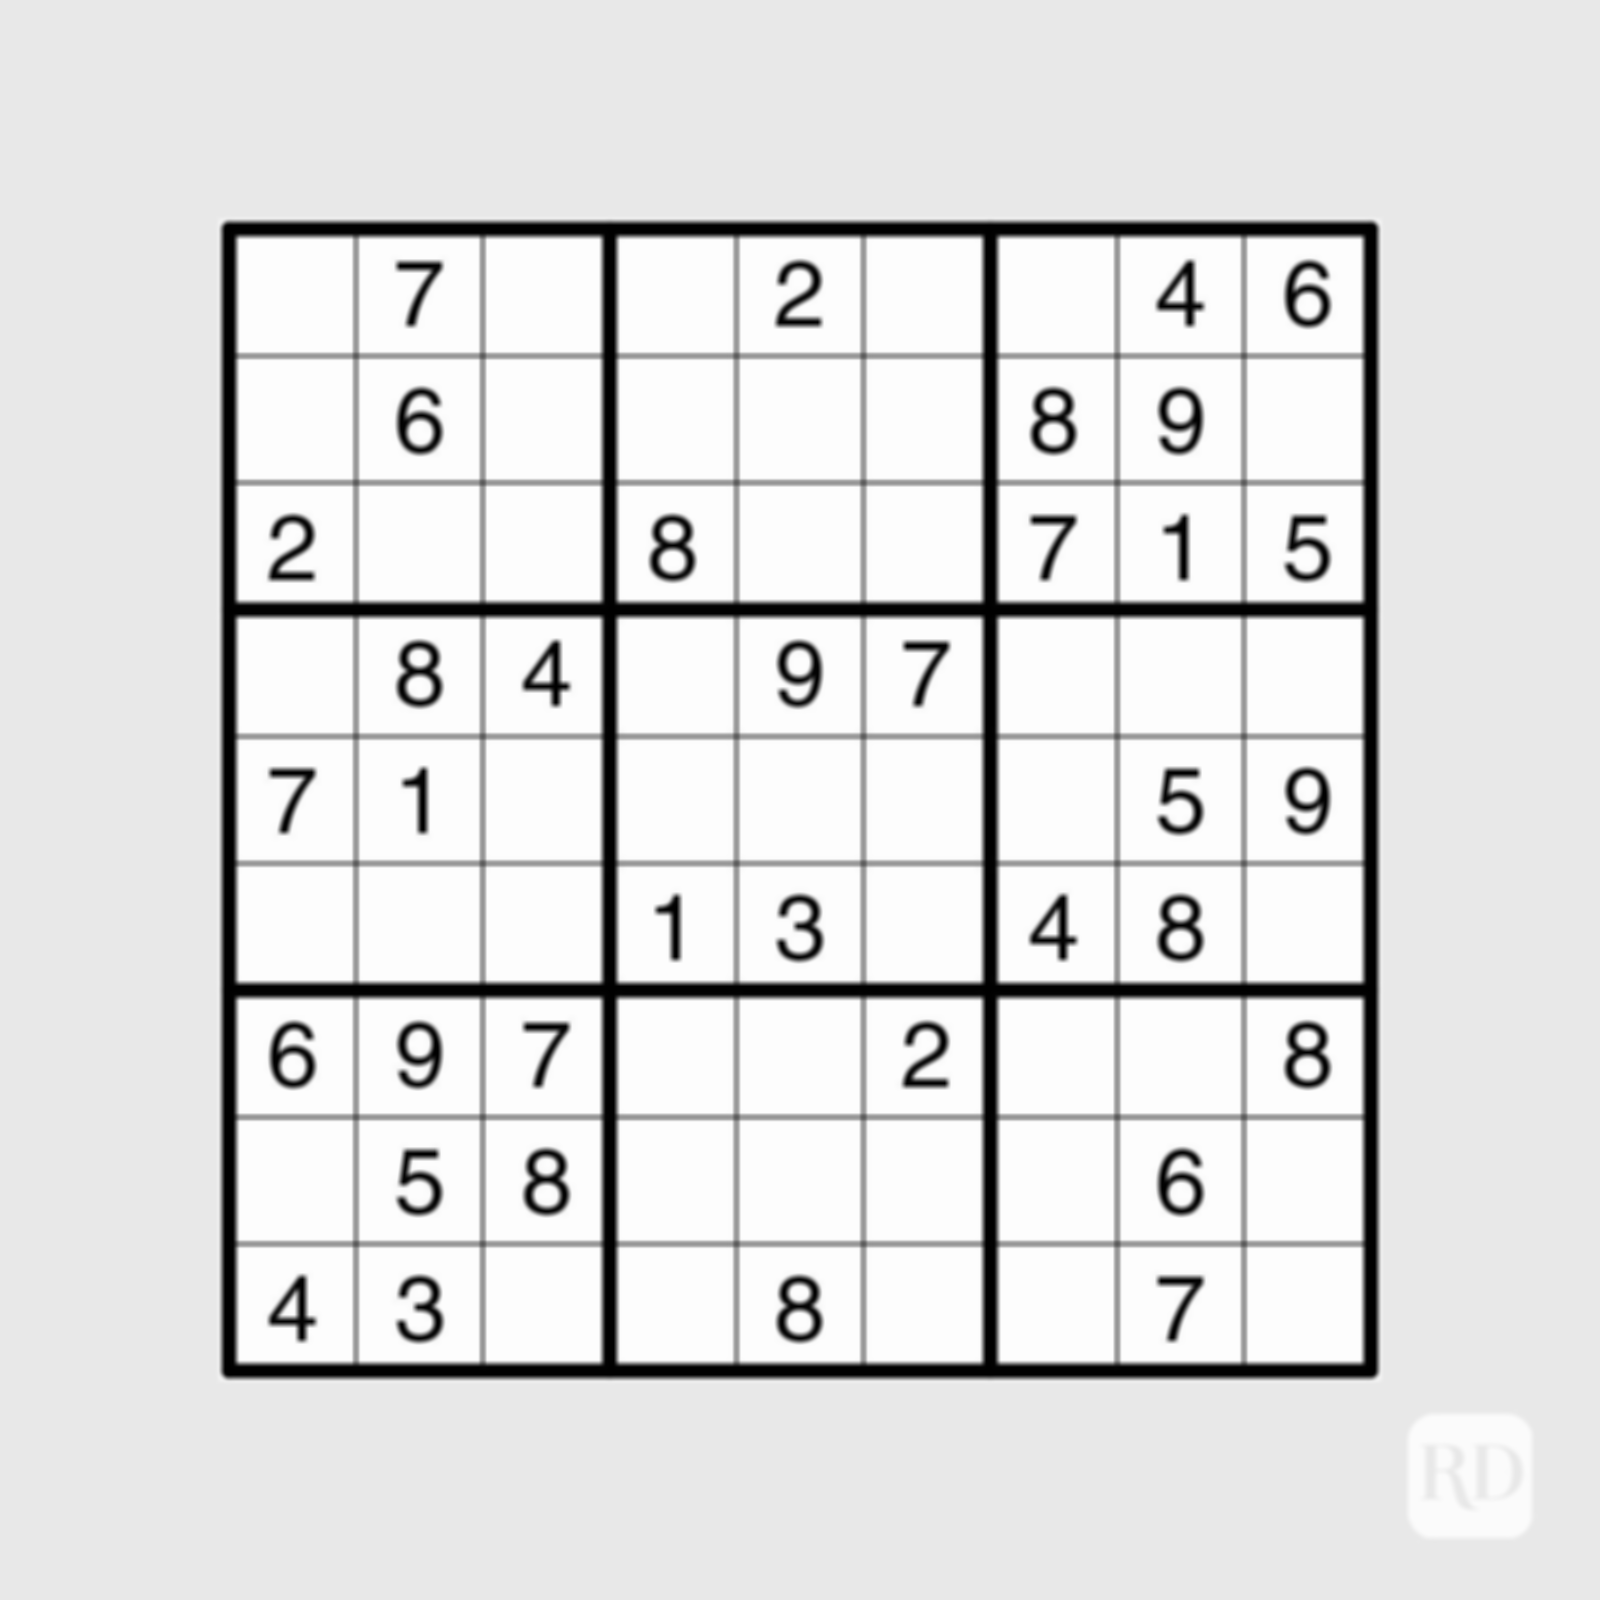

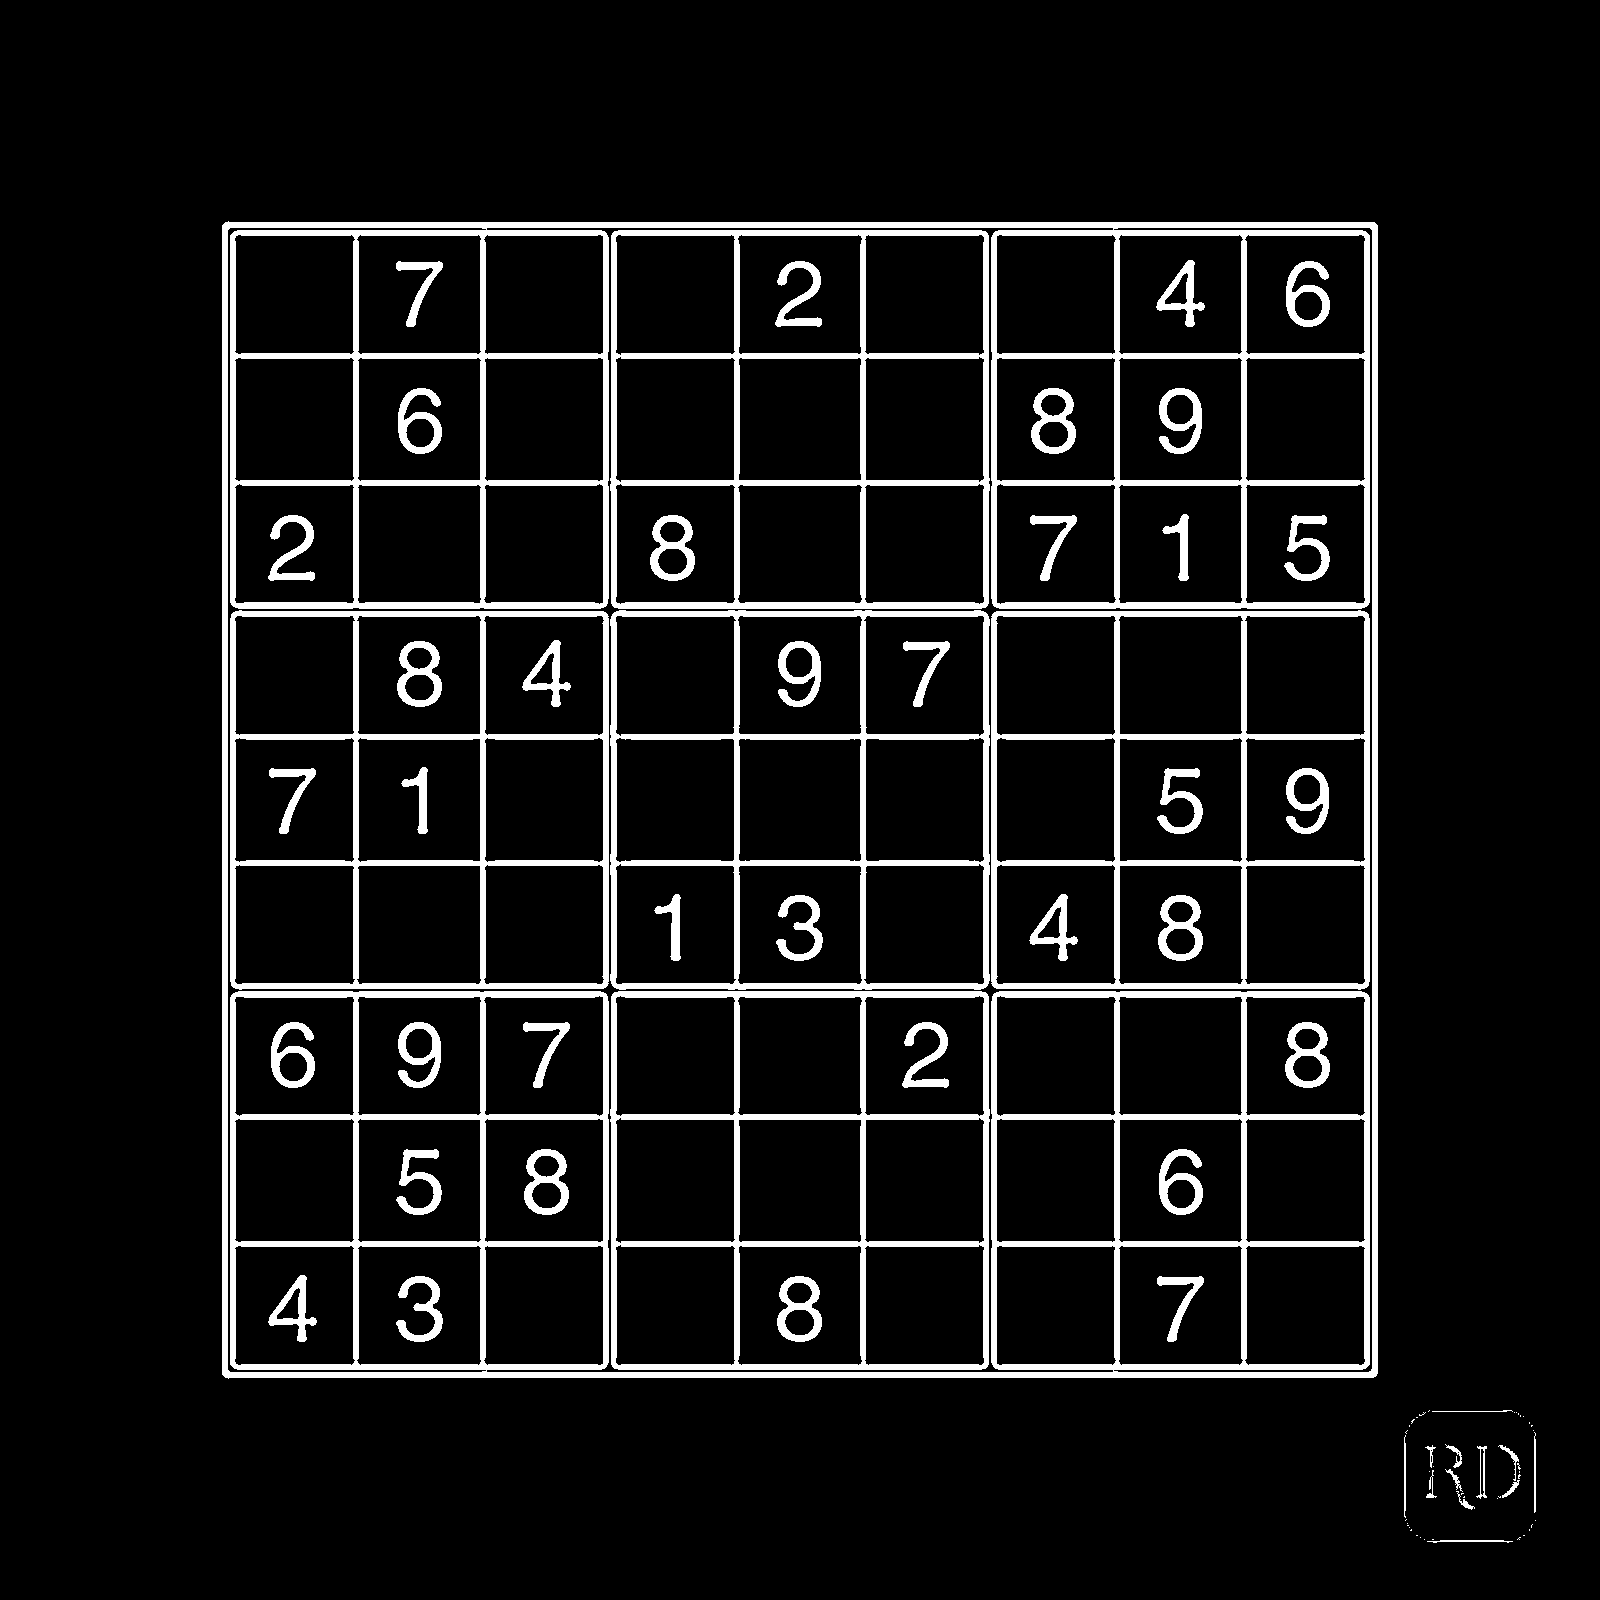

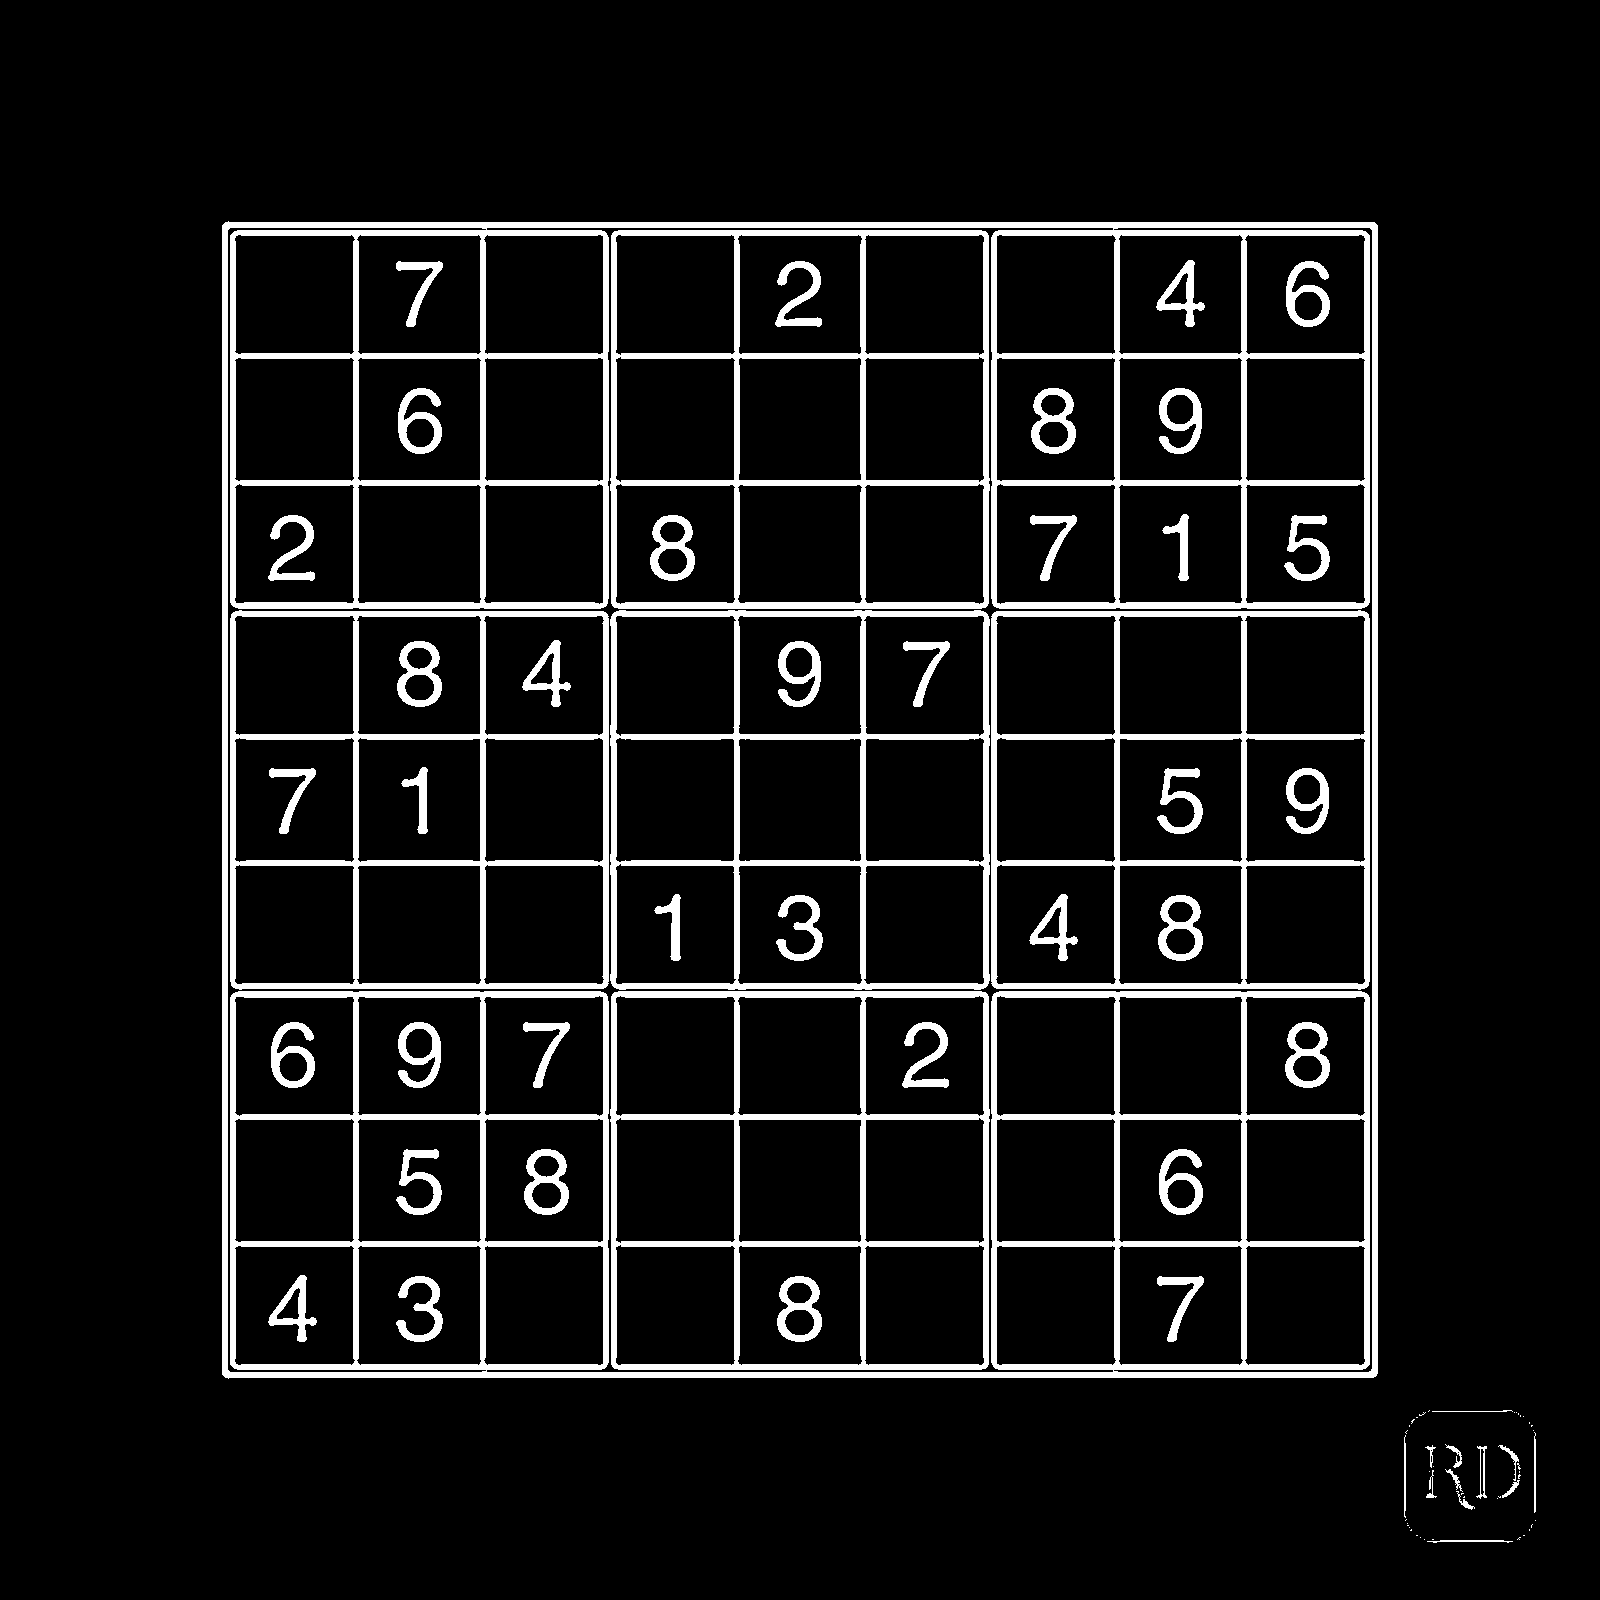

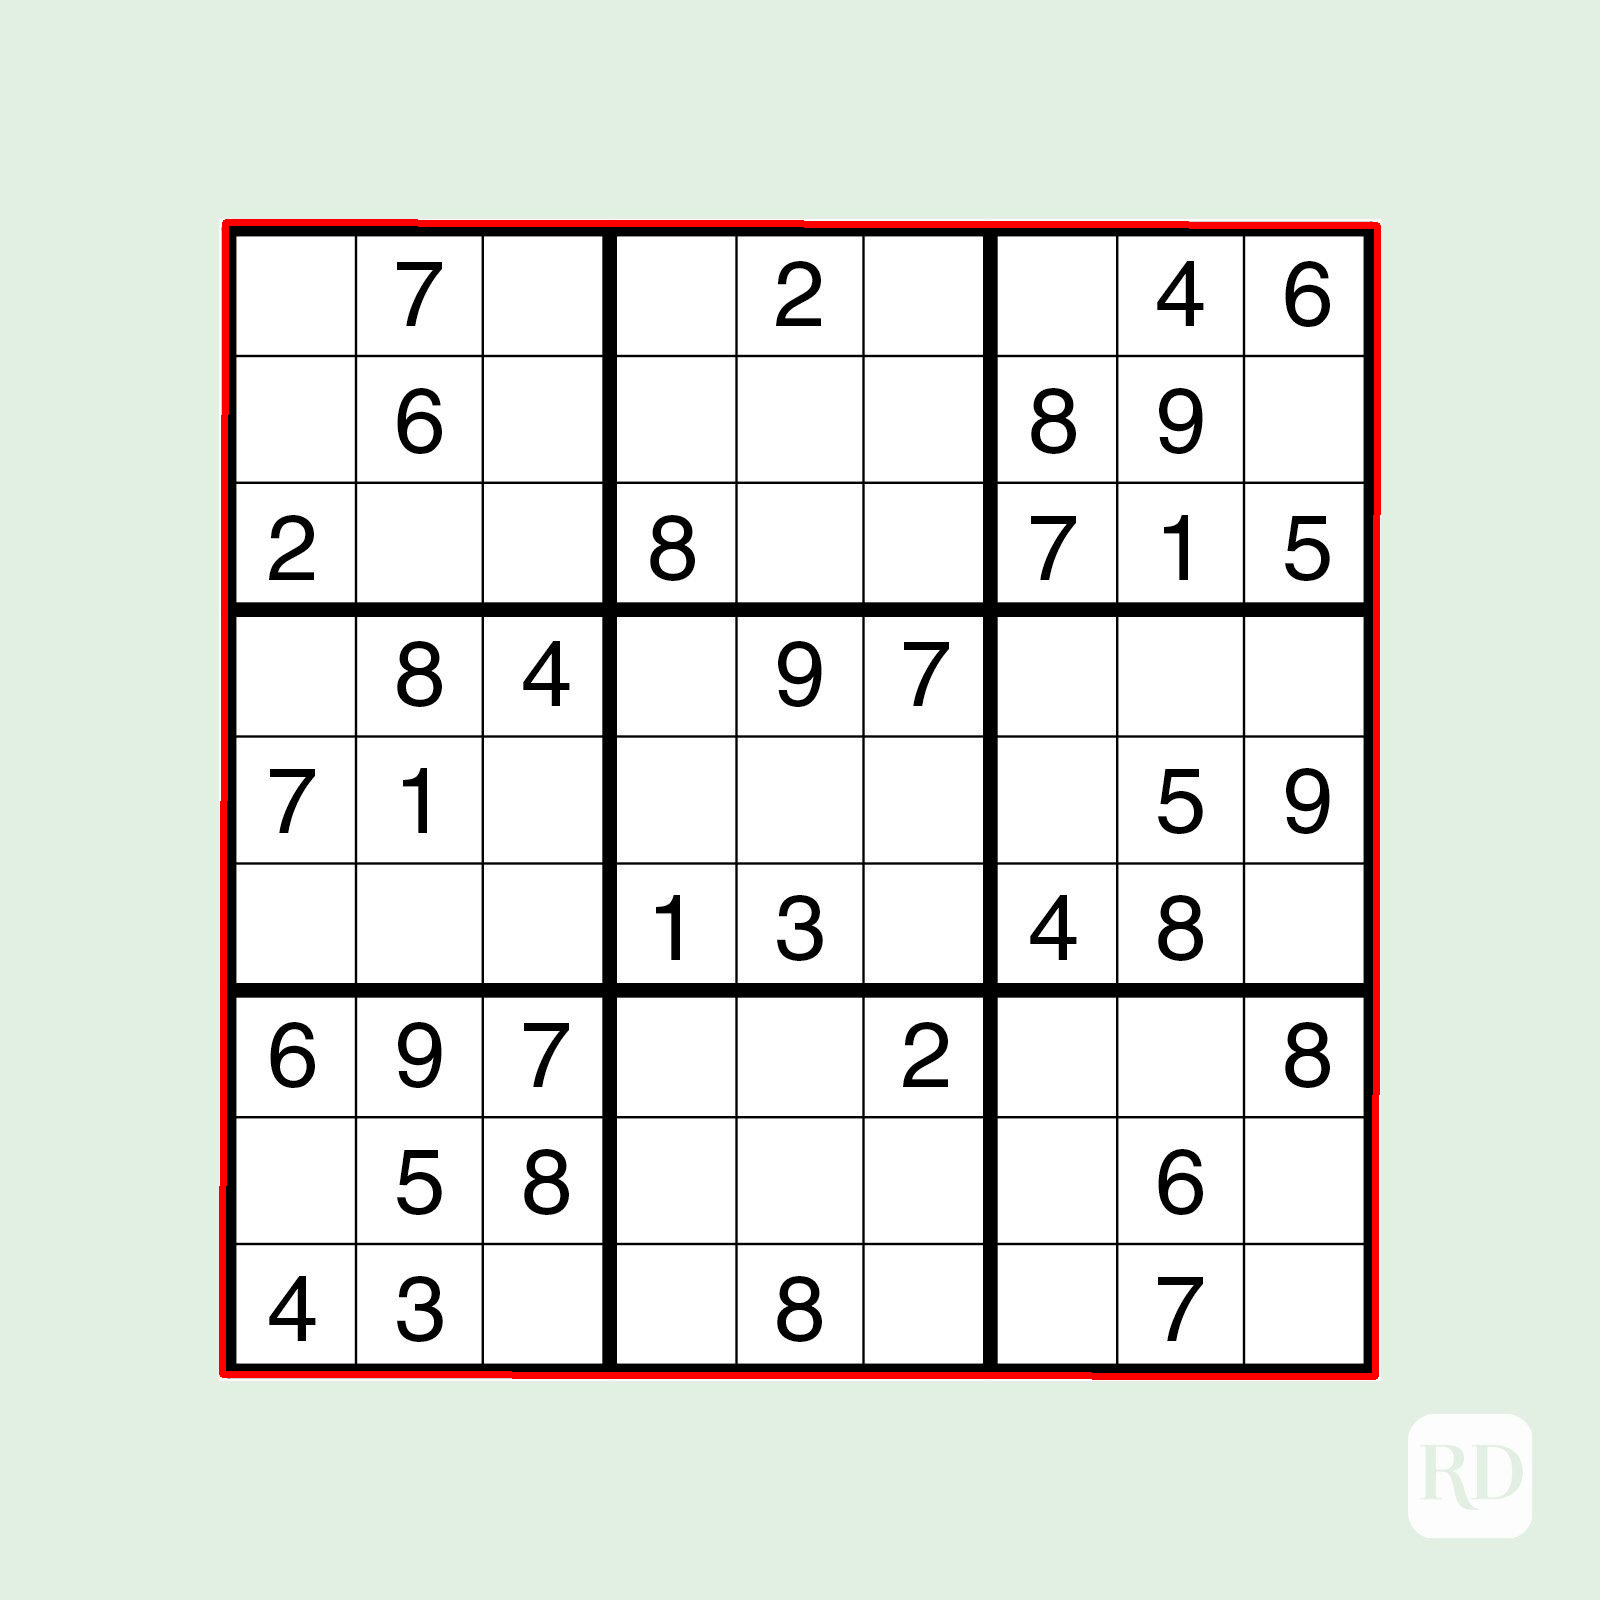

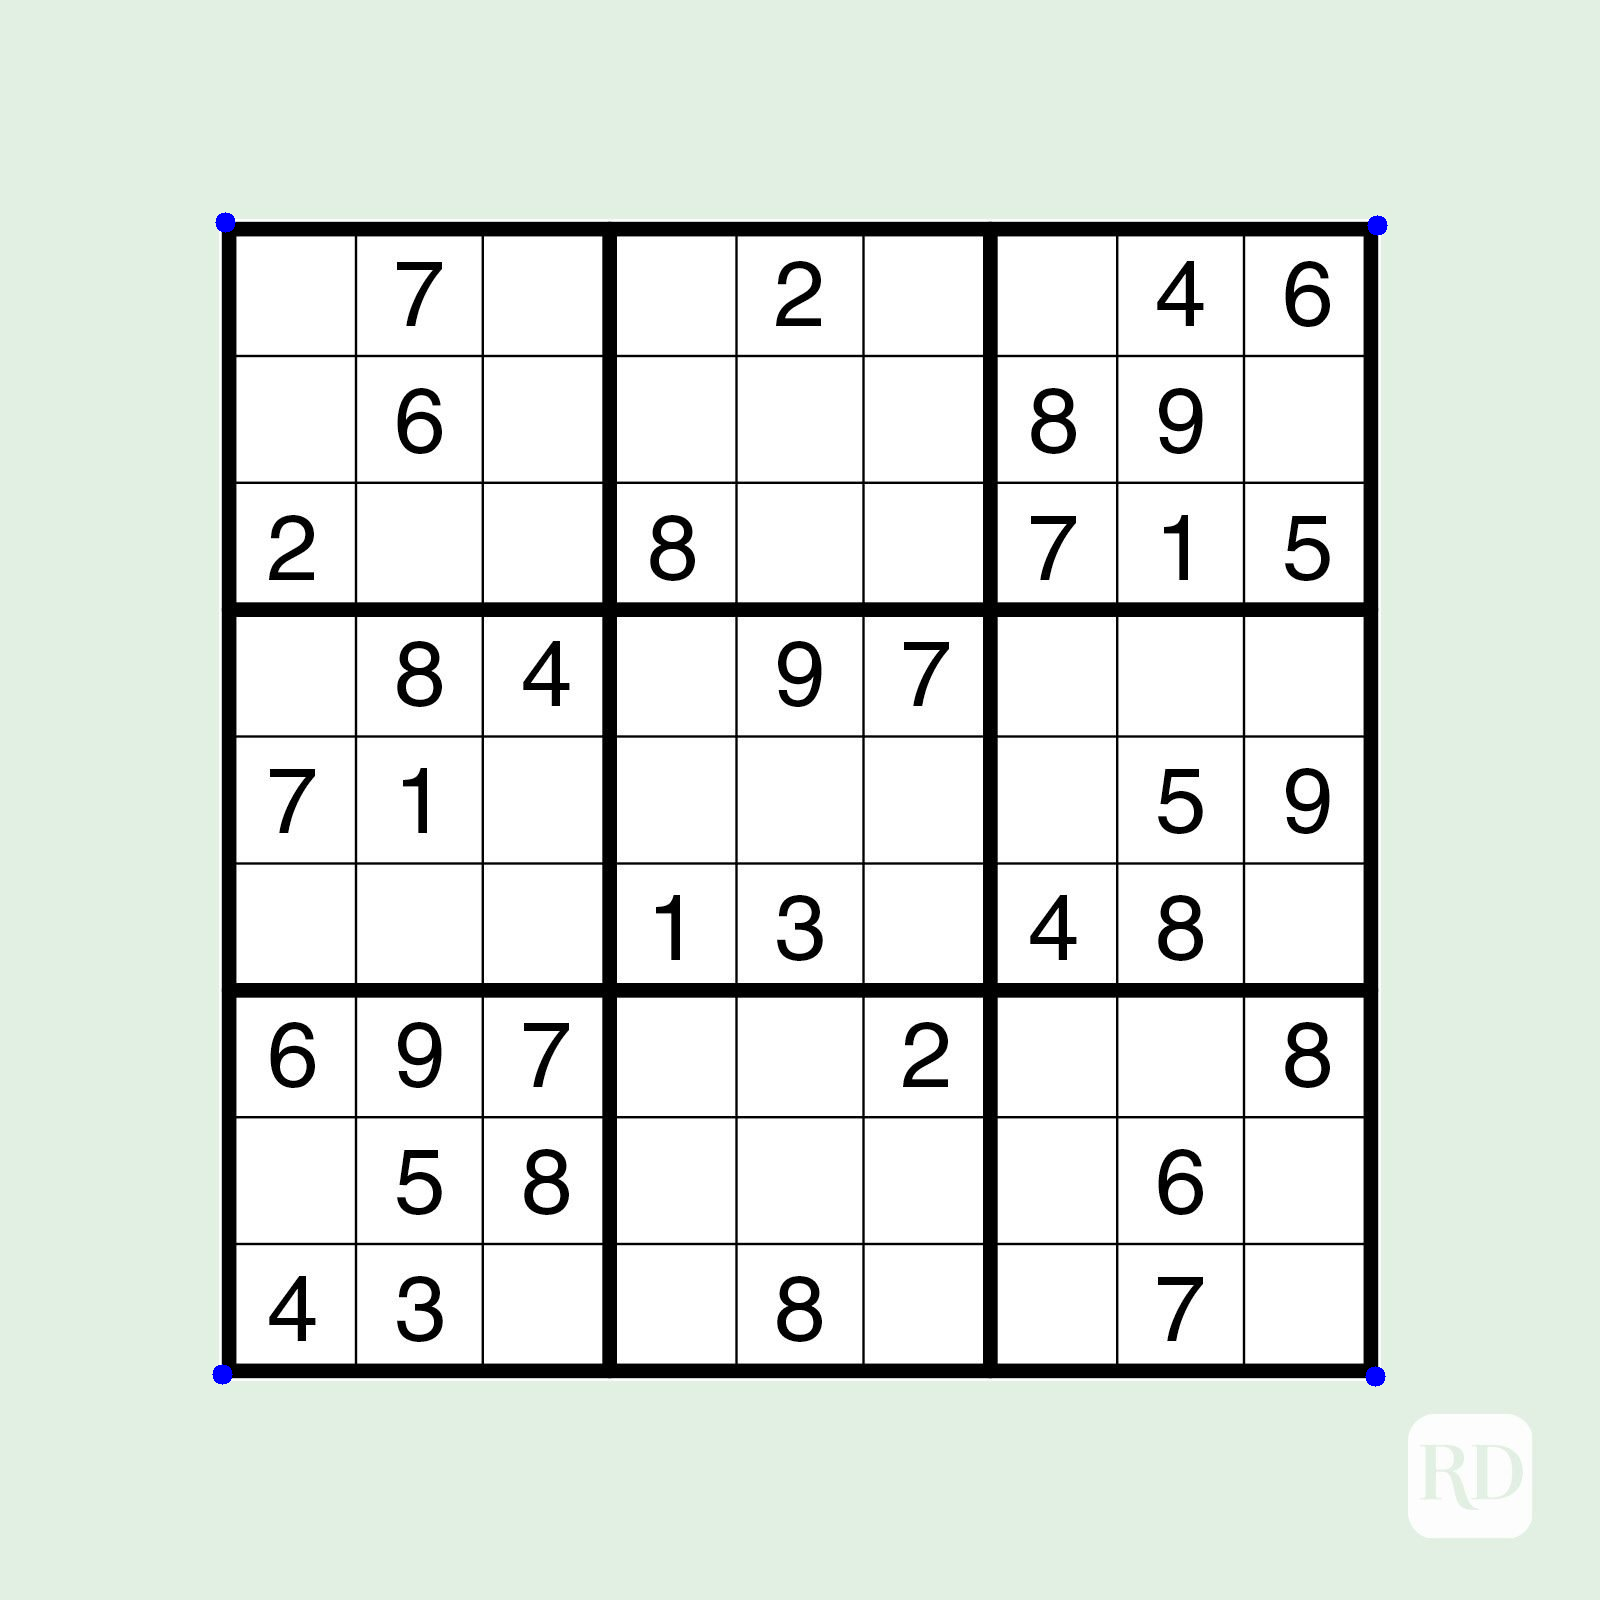

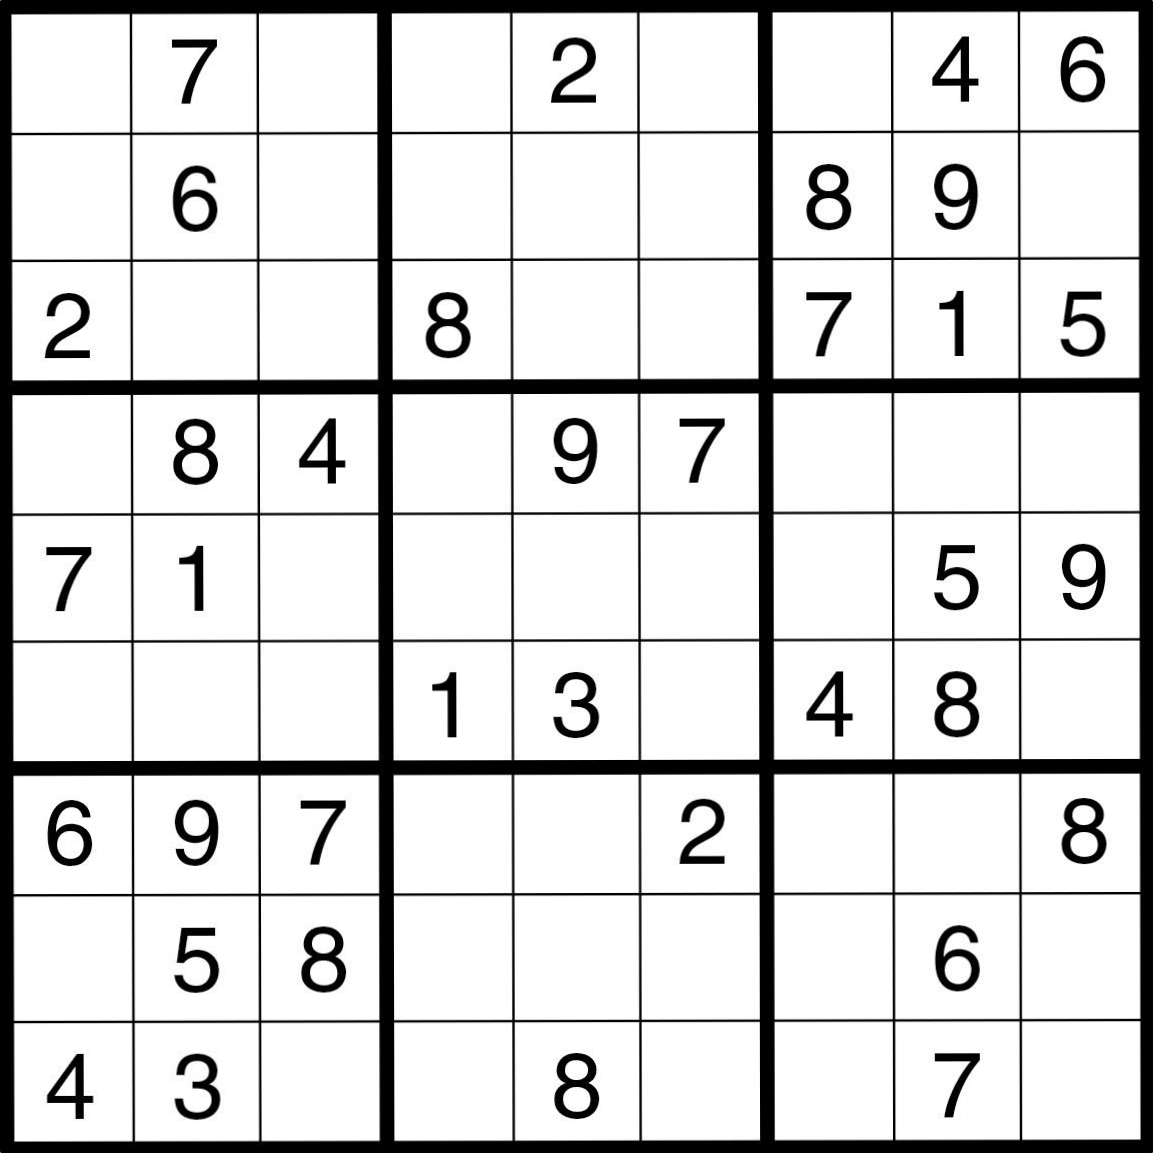

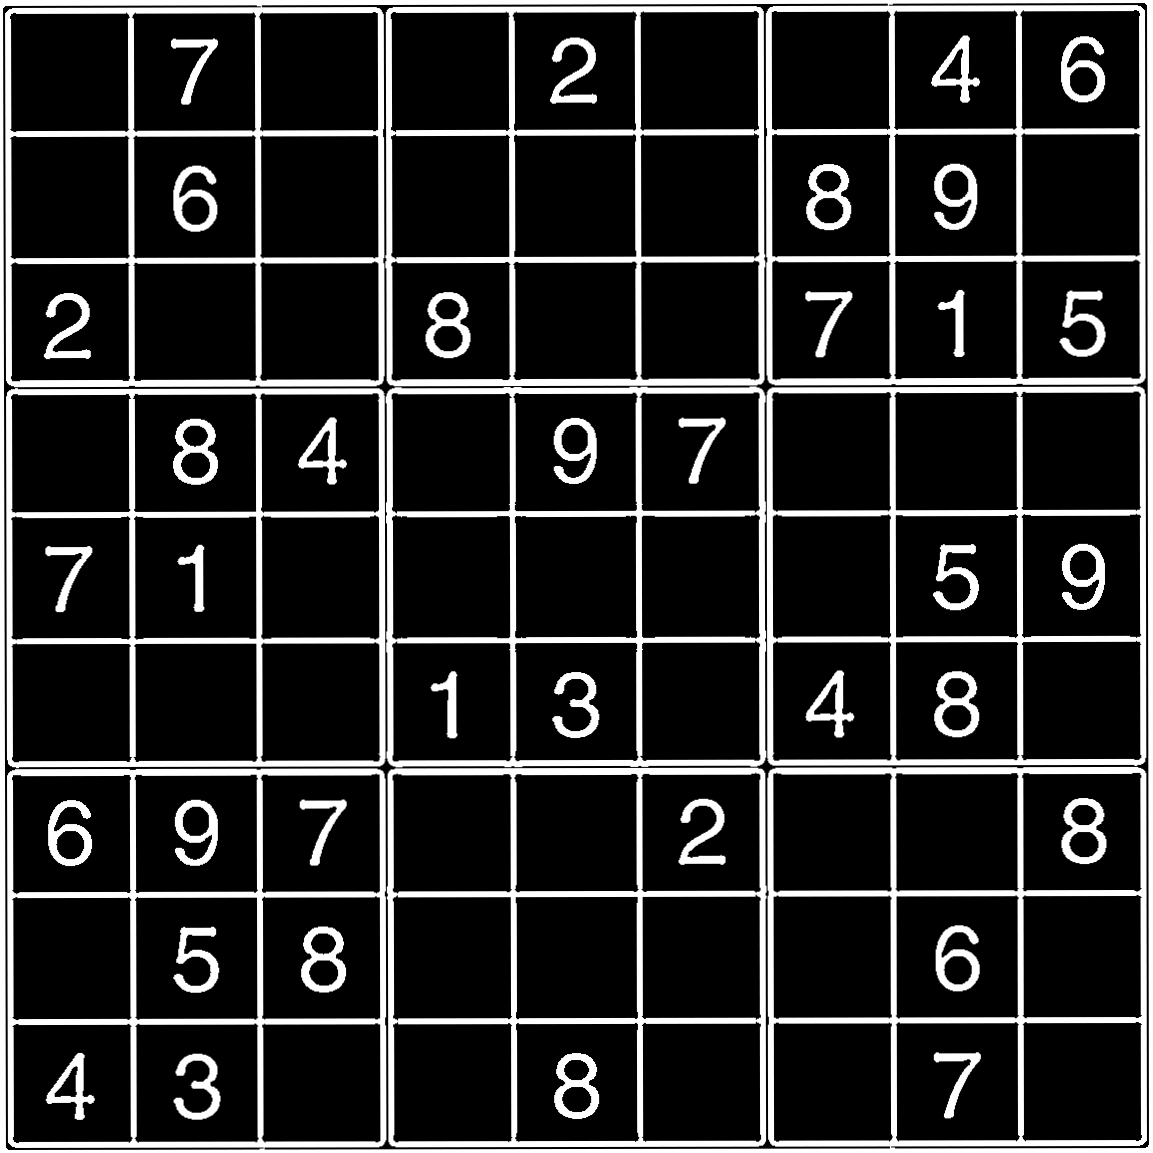

In [116]:
img1 = image_preproccesor(image1)

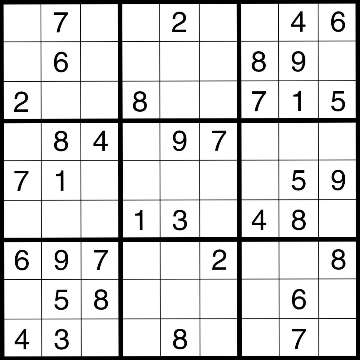

tensor([0])


tensor([7, 7, 7])
torch.return_types.mode(
values=tensor(7),
indices=tensor(2))


/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:75: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:109: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([0])


tensor([0])


tensor([2, 2, 2])
torch.return_types.mode(
values=tensor(2),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([4, 4, 4])
torch.return_types.mode(
values=tensor(4),
indices=tensor(2))


tensor([6, 6, 6])
torch.return_types.mode(
values=tensor(6),
indices=tensor(2))


tensor([0])


tensor([6, 6, 6])
torch.return_types.mode(
values=tensor(6),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([0])


tensor([0])


tensor([8, 8, 8])
torch.return_types.mode(
values=tensor(8),
indices=tensor(2))


tensor([9, 9, 9])
torch.return_types.mode(
values=tensor(9),
indices=tensor(2))


tensor([0])


tensor([2, 2, 2])
torch.return_types.mode(
values=tensor(2),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([8, 8, 8])
torch.return_types.mode(
values=tensor(8),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([7, 7, 7])
torch.return_types.mode(
values=tensor(7),
indices=tensor(2))


tensor([1, 1, 1])
torch.return_types.mode(
values=tensor(1),
indices=tensor(2))


tensor([5, 5, 5])
torch.return_types.mode(
values=tensor(5),
indices=tensor(2))


tensor([0])


tensor([8, 8, 8])
torch.return_types.mode(
values=tensor(8),
indices=tensor(2))


tensor([4, 4, 4])
torch.return_types.mode(
values=tensor(4),
indices=tensor(2))


tensor([0])


tensor([9, 9, 9])
torch.return_types.mode(
values=tensor(9),
indices=tensor(2))


tensor([7, 7, 7])
torch.return_types.mode(
values=tensor(7),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([0])


tensor([7, 7, 7])
torch.return_types.mode(
values=tensor(7),
indices=tensor(2))


tensor([1, 1, 1])
torch.return_types.mode(
values=tensor(1),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([0])


tensor([0])


tensor([0])


tensor([5, 5, 5])
torch.return_types.mode(
values=tensor(5),
indices=tensor(2))


tensor([9, 9, 9])
torch.return_types.mode(
values=tensor(9),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([0])


tensor([1, 1, 1])
torch.return_types.mode(
values=tensor(1),
indices=tensor(2))


tensor([3, 3, 3])
torch.return_types.mode(
values=tensor(3),
indices=tensor(2))


tensor([0])


tensor([4, 4, 4])
torch.return_types.mode(
values=tensor(4),
indices=tensor(2))


tensor([8, 8, 9])
torch.return_types.mode(
values=tensor(8),
indices=tensor(1))


tensor([0])


tensor([6, 6, 6])
torch.return_types.mode(
values=tensor(6),
indices=tensor(2))


tensor([9, 9, 9])
torch.return_types.mode(
values=tensor(9),
indices=tensor(2))


tensor([7, 7, 7])
torch.return_types.mode(
values=tensor(7),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([2, 2, 2])
torch.return_types.mode(
values=tensor(2),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([0, 9, 9])
torch.return_types.mode(
values=tensor(9),
indices=tensor(2))


tensor([0])


tensor([5, 5, 5])
torch.return_types.mode(
values=tensor(5),
indices=tensor(2))


tensor([8, 8, 8])
torch.return_types.mode(
values=tensor(8),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([0])


tensor([0])


tensor([0, 9, 9])
torch.return_types.mode(
values=tensor(9),
indices=tensor(2))


tensor([0])


tensor([4, 4, 4])
torch.return_types.mode(
values=tensor(4),
indices=tensor(2))


tensor([3, 3, 3])
torch.return_types.mode(
values=tensor(3),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([8, 9, 9])
torch.return_types.mode(
values=tensor(9),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([2, 7, 7])
torch.return_types.mode(
values=tensor(7),
indices=tensor(2))


tensor([0])
[[0 7 0 0 2 0 0 4 6]
 [0 6 0 0 0 0 8 9 0]
 [2 0 0 8 0 0 7 1 5]
 [0 8 4 0 9 7 0 0 0]
 [7 1 0 0 0 0 0 5 9]
 [0 0 0 1 3 0 4 8 0]
 [6 9 7 0 0 2 0 0 9]
 [0 5 8 0 0 0 0 9 0]
 [4 3 0 0 9 0 0 7 0]]


In [117]:
sudoku1_read = sudoku_reader(img1[0],model1,model2,model3,show=True)